![data-x](http://oi64.tinypic.com/o858n4.jpg)

___

## Homework 04


## NAME: 

## STUDENT ID: 

In [2]:
# Load required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



## Pandas Introduction


##  Reading File


#### 1.1) Read the CSV file called 'data3.csv' into a dataframe called df. 
#### Data description
* Data source: http://www.fao.org/nr/water/aquastat/data/query/index.html?* lang=en
* Data, units:
* GDP, current USD (CPI adjusted)
* NRI, mm/yr
* Population density, inhab/km^2
* Total area of the country, 1000 ha = 10km^2
* Total Population, unit 1000 inhabitants


In [3]:
# your code here

df = pd.read_csv('data3.csv')


#### 2.1 ) Display the first 10 rows of the dataframe

In [4]:
# your code here

df.head(10)

,Area,Area Id,Variable Name,Variable Id,Year,Value,Symbol,Other
0,Argentina,9.0,Total area of the country,4100.0,1962.0,278040.0,E,NaN
1,Argentina,9.0,Total area of the country,4100.0,1967.0,278040.0,E,NaN
2,Argentina,9.0,Total area of the country,4100.0,1972.0,278040.0,E,NaN
3,Argentina,9.0,Total area of the country,4100.0,1977.0,278040.0,E,NaN
4,Argentina,9.0,Total area of the country,4100.0,1982.0,278040.0,E,NaN
5,Argentina,9.0,Total area of the country,4100.0,1987.0,278040.0,E,NaN
6,Argentina,9.0,Total area of the country,4100.0,1992.0,278040.0,E,NaN
7,Argentina,9.0,Total area of the country,4100.0,1997.0,278040.0,E,NaN
8,Argentina,9.0,Total area of the country,4100.0,2002.0,278040.0,E,NaN
9,Argentina,9.0,Total area of the country,4100.0,2007.0,278040.0,E,NaN


#### 2.2 ) Display the column names.

In [5]:
# your code here

df.columns

Index(['Area', 'Area Id', 'Variable Name', 'Variable Id', 'Year', 'Value',
       'Symbol', 'Other'],
      dtype='object')

#### 2.3) Use iloc to display the first 3 rows and first 4 columns.

In [6]:
# your code here

df.iloc[0:3,0:4] # 0th to 3rd row, 0th to 4th col


,Area,Area Id,Variable Name,Variable Id
0,Argentina,9.0,Total area of the country,4100.0
1,Argentina,9.0,Total area of the country,4100.0
2,Argentina,9.0,Total area of the country,4100.0




## Data Preprocessing

#### 3.1 ) Find all the rows that  have 'NaN' in the 'Symbol' column. Display first 5 rows.

##### Hint : You might have to use a mask

In [7]:
# your code here

df[(df['Symbol']!= 'E')].head(5)

,Area,Area Id,Variable Name,Variable Id,Year,Value,Symbol,Other
390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
391,E - External data,NaN,NaN,NaN,NaN,NaN,NaN,NaN
392,I - AQUASTAT estimate,NaN,NaN,NaN,NaN,NaN,NaN,NaN
393,K - Aggregate data,NaN,NaN,NaN,NaN,NaN,NaN,NaN
394,L - Modelled data,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 3.2 )  Now, we will try to get rid of the NaN valued rows and columns. First, drop the column 'Other' which only has 'NaN' values. Then drop all other rows that have any column with a value 'NaN'.  Then display the last 5 rows of the dataframe.

In [8]:
# your code here

df = pd.read_csv('data3.csv')
#reload the data in this function
df = df.drop('Other', axis=1)
#drop the column that only has NaN's in it
# ^ works
df = df.dropna(subset=['Symbol'])
#drop remaining rows that contain Nan's
df.tail(5)

,Area,Area Id,Variable Name,Variable Id,Year,Value,Symbol
385,United States of America,231.0,National Rainfall Index (NRI),4472.0,1981.0,949.2,E
386,United States of America,231.0,National Rainfall Index (NRI),4472.0,1984.0,974.6,E
387,United States of America,231.0,National Rainfall Index (NRI),4472.0,1992.0,1020.0,E
388,United States of America,231.0,National Rainfall Index (NRI),4472.0,1996.0,1005.0,E
389,United States of America,231.0,National Rainfall Index (NRI),4472.0,2002.0,938.7,E


#### 4.1) For our analysis we do not want all the columns in our dataframe. Lets  drop all the redundant columns/ features.   
#### **Drop columns**: **Area Id, Variable Id, Symbol**. Save the new dataframe as df1. Display the first 5 rows of the new dataframe.


In [9]:
# your code here

df = df.drop('Area Id', axis=1)
#drop the 'Area Id' column
df = df.drop('Variable Id', axis=1)
#drop the 'Variable Id' column
df = df.drop('Symbol', axis=1)
#drop the 'Symbol' column
df1 = df
#create new dataframe
df1.tail(5)
#display the end of the ne

,Area,Variable Name,Year,Value
385,United States of America,National Rainfall Index (NRI),1981.0,949.2
386,United States of America,National Rainfall Index (NRI),1984.0,974.6
387,United States of America,National Rainfall Index (NRI),1992.0,1020.0
388,United States of America,National Rainfall Index (NRI),1996.0,1005.0
389,United States of America,National Rainfall Index (NRI),2002.0,938.7


#### 4.2) Display all the unique values in your new dataframe for columns: Area, Variable Name, Year.


In [10]:
# your code here

print (pd.unique(df1['Area']))
print (pd.unique(df1['Variable Name']))
print (pd.unique(df1['Year']))

['Argentina' 'Australia' 'Germany' 'Iceland' 'Ireland' 'Sweden'
 'United States of America']
['Total area of the country' 'Total population' 'Population density'
 'Gross Domestic Product (GDP)' 'National Rainfall Index (NRI)']
[1962. 1967. 1972. 1977. 1982. 1987. 1992. 1997. 2002. 2007. 2012. 2014.
 2015. 1963. 1970. 1974. 1978. 1984. 1990. 1964. 1981. 1985. 1996. 2001.
 1969. 1973. 1979. 1993. 1971. 1975. 1986. 1991. 1998. 2000. 1965. 1983.
 1988. 1995.]


#### 4.3) Convert the Year column to pandas datetime. Convert the 'Year' column float values to pandas datetime objects, where each year is represented as the first day of that year. Also display the first 5 values of column after conversion.

##### For eg: 1962.0 will be represented as 1962-01-01 


In [12]:
# your code here

df1['Year'] = df1['Year'].astype(int)
df1['Year'] = pd.to_datetime(df1['Year'], format = '%Y')
df1.head(5)
#df_google['date'] = pd.to_datetime(df_google['date'],infer_datetime_format=True) --> something like this...

,Area,Variable Name,Year,Value
0,Argentina,Total area of the country,1962-01-01,278040.0
1,Argentina,Total area of the country,1967-01-01,278040.0
2,Argentina,Total area of the country,1972-01-01,278040.0
3,Argentina,Total area of the country,1977-01-01,278040.0
4,Argentina,Total area of the country,1982-01-01,278040.0


## Plot

#### 5.1) Use pandas to plot a bar graph showing the count for each unique value in the column 'Area'. Give it a title.

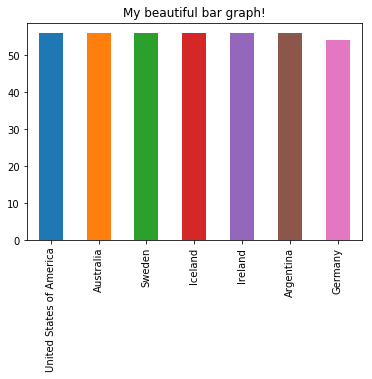

In [13]:
# your code here

pd.value_counts(df1['Area']).plot.bar(title = "My beautiful bar graph!")
#value_counts works really well for this -- faster than hist()

## Extract specific statistics from the preprocessed data:

#### 6.1)  Create a dataframe 'dftemp' to store rows where Area is 'Iceland'. Display the dataframe.

In [14]:
# your code here

dftemp = df1[df1.Area == 'Iceland']
#this .Area member works well
dftemp
# ^^ it works!

,Area,Variable Name,Year,Value
166,Iceland,Total area of the country,1962-01-01,1.030000e+04
167,Iceland,Total area of the country,1967-01-01,1.030000e+04
168,Iceland,Total area of the country,1972-01-01,1.030000e+04
169,Iceland,Total area of the country,1977-01-01,1.030000e+04
170,Iceland,Total area of the country,1982-01-01,1.030000e+04
171,Iceland,Total area of the country,1987-01-01,1.030000e+04
172,Iceland,Total area of the country,1992-01-01,1.030000e+04
173,Iceland,Total area of the country,1997-01-01,1.030000e+04
174,Iceland,Total area of the country,2002-01-01,1.030000e+04
175,Iceland,Total area of the country,2007-01-01,1.030000e+04


#### 7.1) Print the years when the National Rainfall Index (NRI) was greater than 900 and less than 950 in Iceland. Use the dataframe you created in the previous question 'dftemp'. 

In [ ]:
# your code here

In [15]:
mask = (dftemp[dftemp["Variable Name"] == 'National Rainfall Index (NRI)']['Value'] < 950) &\
(dftemp[dftemp["Variable Name"] == 'National Rainfall Index (NRI)']['Value'] > 900)
#create mask
#mask
#^checks mask for debugging
dftemp[dftemp["Variable Name"] == 'National Rainfall Index (NRI)'].Year[ mask]


217   1981-01-01
221   1998-01-01
Name: Year, dtype: datetime64[ns]

## US statistics: 


#### 8.1) Create a new DataFrame called **`df_usa`** that only contains values where 'Area' is equal to 'United States of America'. Set the indices to be the 'Year' column    ( Use .set_index( ) ). Display the dataframe head.

In [16]:
# your code here

df_usa = df1[df1.Area == 'United States of America']
#create the df_usa dataFrame
df_usa = df_usa.set_index('Year')
#you need to assign the df_usa.set_index() to df_usa
df_usa.head()
#display the beginning

,Area,Variable Name,Value
Year,,,
1962-01-01,United States of America,Total area of the country,962909.0
1967-01-01,United States of America,Total area of the country,962909.0
1972-01-01,United States of America,Total area of the country,962909.0
1977-01-01,United States of America,Total area of the country,962909.0
1982-01-01,United States of America,Total area of the country,962909.0



#### 8.2) Pivot the DataFrame so that the unique values in the column 'Variable Name' becomes the columns. The DataFrame values should be the ones in the the 'Value' column. Save it in df_usa. Display the dataframe head.

In [17]:
# your code here

df_usa = df_usa.pivot(columns = "Variable Name", values = "Value" )
df_usa

Variable Name,Gross Domestic Product (GDP),National Rainfall Index (NRI),Population density,Total area of the country,Total population
Year,,,,,
1962-01-01,6.050000e+11,NaN,19.93,962909.0,191861.0
1965-01-01,NaN,928.5,NaN,NaN,NaN
1967-01-01,8.620000e+11,NaN,21.16,962909.0,203713.0
1969-01-01,NaN,952.2,NaN,NaN,NaN
1972-01-01,1.280000e+12,NaN,22.14,962909.0,213220.0
1974-01-01,NaN,1008.0,NaN,NaN,NaN
1977-01-01,2.090000e+12,NaN,23.17,962909.0,223091.0
1981-01-01,NaN,949.2,NaN,NaN,NaN
1982-01-01,3.340000e+12,NaN,24.30,962909.0,233954.0


#### 8.3) Rename new columns to  ['GDP','NRI','PD','Area','Population'] and display the head.


In [18]:
# your code here

df_usa = df_usa.rename(columns = {'Gross Domestic Product (GDP)':'GDP'})
df_usa = df_usa.rename(columns = {'National Rainfall Index (NRI)': 'NRI'})
df_usa = df_usa.rename(columns = {'Population density' : 'PD'})
df_usa = df_usa.rename(columns = {'Total area of the country' : 'Area'})
df_usa = df_usa.rename(columns = {'Total population':'Population'})
df_usa

Variable Name,GDP,NRI,PD,Area,Population
Year,,,,,
1962-01-01,6.050000e+11,NaN,19.93,962909.0,191861.0
1965-01-01,NaN,928.5,NaN,NaN,NaN
1967-01-01,8.620000e+11,NaN,21.16,962909.0,203713.0
1969-01-01,NaN,952.2,NaN,NaN,NaN
1972-01-01,1.280000e+12,NaN,22.14,962909.0,213220.0
1974-01-01,NaN,1008.0,NaN,NaN,NaN
1977-01-01,2.090000e+12,NaN,23.17,962909.0,223091.0
1981-01-01,NaN,949.2,NaN,NaN,NaN
1982-01-01,3.340000e+12,NaN,24.30,962909.0,233954.0


#### 8.4) Replace all 'Nan' values in df_usa with 0. Display the head of the dataframe.

In [19]:
# your code here

df_usa = df_usa.fillna(value = 0)
#replaces NaNs with whatever the value is
df_usa

Variable Name,GDP,NRI,PD,Area,Population
Year,,,,,
1962-01-01,6.050000e+11,0.0,19.93,962909.0,191861.0
1965-01-01,0.000000e+00,928.5,0.00,0.0,0.0
1967-01-01,8.620000e+11,0.0,21.16,962909.0,203713.0
1969-01-01,0.000000e+00,952.2,0.00,0.0,0.0
1972-01-01,1.280000e+12,0.0,22.14,962909.0,213220.0
1974-01-01,0.000000e+00,1008.0,0.00,0.0,0.0
1977-01-01,2.090000e+12,0.0,23.17,962909.0,223091.0
1981-01-01,0.000000e+00,949.2,0.00,0.0,0.0
1982-01-01,3.340000e+12,0.0,24.30,962909.0,233954.0


## Use df_usa:

#### 9.1 Multiply the 'Area' column for all countries by 10 (so instead of 1000 ha, the unit becomes 100 ha = 1km^2). Display the dataframe head.


In [20]:
# your code here

df_usa.Area = df_usa.Area*10
df_usa.head()

Variable Name,GDP,NRI,PD,Area,Population
Year,,,,,
1962-01-01,6.050000e+11,0.0,19.93,9629090.0,191861.0
1965-01-01,0.000000e+00,928.5,0.00,0.0,0.0
1967-01-01,8.620000e+11,0.0,21.16,9629090.0,203713.0
1969-01-01,0.000000e+00,952.2,0.00,0.0,0.0
1972-01-01,1.280000e+12,0.0,22.14,9629090.0,213220.0



#### 9.2: Create a new column in df_usa called 'GDP/capita' and populate it with the calculated GDP per capita. Round the results to two decimal points. Display the dataframe head.
GDP per capita = (GDP / Population) * 1000

In [21]:
# your code here

df_usa['GDP/capita']= round((df_usa['GDP'])/(df_usa['Population'])*1000, 2)
#using the above mentioned function
df_usa = df_usa.fillna(value = 0)
#resetting the Nans to the value = 0
df_usa.head()

Variable Name,GDP,NRI,PD,Area,Population,GDP/capita
Year,,,,,,
1962-01-01,6.050000e+11,0.0,19.93,9629090.0,191861.0,3.153325e+09
1965-01-01,0.000000e+00,928.5,0.00,0.0,0.0,0.000000e+00
1967-01-01,8.620000e+11,0.0,21.16,9629090.0,203713.0,4.231443e+09
1969-01-01,0.000000e+00,952.2,0.00,0.0,0.0,0.000000e+00
1972-01-01,1.280000e+12,0.0,22.14,9629090.0,213220.0,6.003189e+09



#### 9.3: Find the maximum value of the 'NRI' column in the US (using pandas methods). What year does the max value occur? Display the values.

In [22]:


# your code here
print ("The max NRI is: ", df_usa.loc[df_usa['NRI'].idxmax()].NRI)
#note: this was very tricky to do
print ("From year: ", df_usa['NRI'].idxmax())
#use the indicies from before

The max NRI is:  1020.0
From year:  1992-01-01 00:00:00
